In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_df_train = pd.read_csv('application_train.csv')
bank_df_test = pd.read_csv('application_test.csv')

In [3]:
pd.set_option('display.max_columns', None)
bank_df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
bank_df_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [5]:
bank_df_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    48744 non-null  int64  
 1   NAME_CONTRACT_TYPE            48744 non-null  object 
 2   CODE_GENDER                   48744 non-null  object 
 3   FLAG_OWN_CAR                  48744 non-null  object 
 4   FLAG_OWN_REALTY               48744 non-null  object 
 5   CNT_CHILDREN                  48744 non-null  int64  
 6   AMT_INCOME_TOTAL              48744 non-null  float64
 7   AMT_CREDIT                    48744 non-null  float64
 8   AMT_ANNUITY                   48720 non-null  float64
 9   AMT_GOODS_PRICE               48744 non-null  float64
 10  NAME_TYPE_SUITE               47833 non-null  object 
 11  NAME_INCOME_TYPE              48744 non-null  object 
 12  NAME_EDUCATION_TYPE           48744 non-null  object 
 13  

In [6]:
#function for missing data
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
missing_bank_train = missing_data(bank_df_train)
missing_bank_train

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [8]:
missing_bank_test = missing_data(bank_df_test)
missing_bank_test

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
...,...,...
REG_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000


In [9]:
clean_data_train = bank_df_train.drop(columns=missing_bank_train[missing_bank_train['Total'] > 5].index)
clean_data_test = bank_df_test.drop(columns=missing_bank_test[missing_bank_test['Total'] > 5].index)

In [10]:
clean_data_train['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [11]:
clean_data_train['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [12]:
clean_data_train.loc[clean_data_train['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=clean_data_train['CNT_FAM_MEMBERS'].mean()
clean_data_train.loc[clean_data_train['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE']=clean_data_train['DAYS_LAST_PHONE_CHANGE'].mean()

In [13]:
clean_data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [14]:
clean_data_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_GOODS_PRICE              48744 non-null  float64
 9   NAME_INCOME_TYPE             48744 non-null  object 
 10  NAME_EDUCATION_TYPE          48744 non-null  object 
 11  NAME_FAMILY_STATUS           48744 non-null  object 
 12  NAME_HOUSING_TYPE            48744 non-null  object 
 13  REGION_POPULATIO

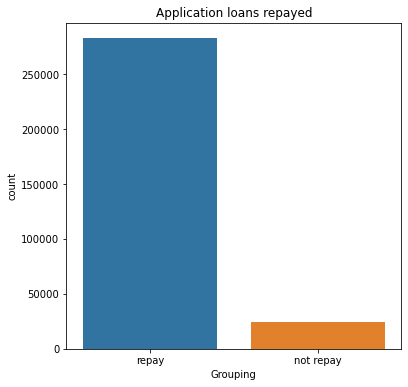

In [15]:
#checking data unbalance
temp = clean_data_train["TARGET"].value_counts()
df = pd.DataFrame({'Grouping': temp.index,
                   'count': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed')
sns.barplot(x = 'Grouping', y="count", data=df)
locs, labels = plt.xticks(ticks=[0,1], labels=["repay", "not repay"])
plt.show()

In [16]:
#Function to create barplot
def plot_stats(feature,label_rotation=False):
    temp = clean_data_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Count': temp.values})
    sns.set_color_codes("pastel")
    s = sns.barplot(x = feature, y="Count",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

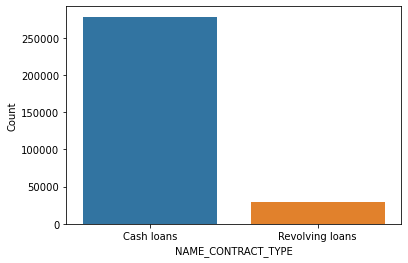

In [17]:
#barplot for Name Contract Type
plot_stats('NAME_CONTRACT_TYPE')

In [47]:
clean_data_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

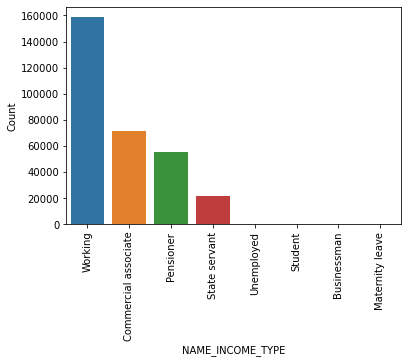

In [18]:
#barplot for Name Income Type
plot_stats('NAME_INCOME_TYPE',True)

In [48]:
clean_data_train['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

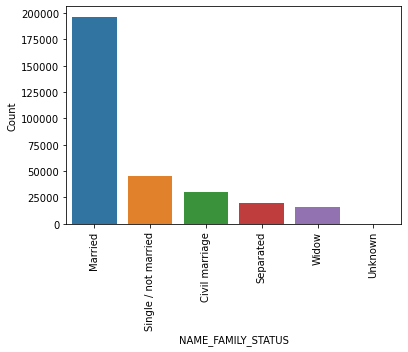

In [19]:
#barplot for Name Family Status
plot_stats('NAME_FAMILY_STATUS',True)

In [49]:
clean_data_train['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

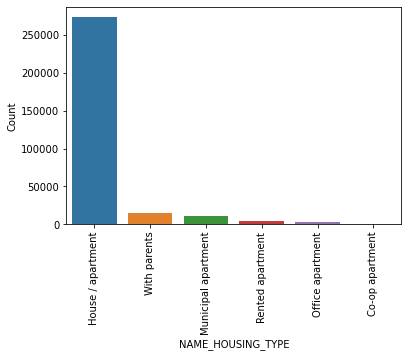

In [20]:
#barplot for Name Housing Type
plot_stats('NAME_HOUSING_TYPE',True)

In [50]:
clean_data_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [44]:
def plot_comparison(f1,f2):
    plt.figure(figsize=(13,7))
    clean_data_train.groupby([f1])[f2].mean().sort_values(ascending=False)[:5].plot.bar()

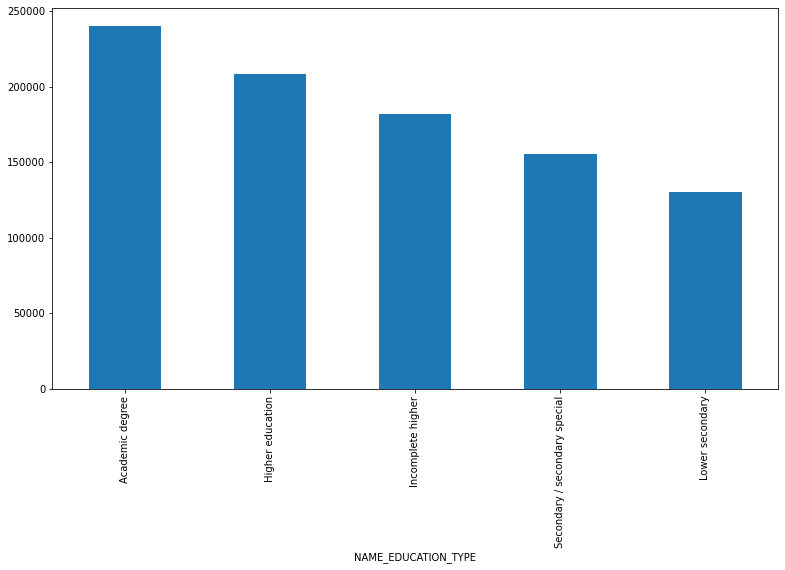

In [46]:
plot_comparison('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

In [51]:
clean_data_train.groupby(['NAME_EDUCATION_TYPE'])['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False)

NAME_EDUCATION_TYPE
Academic degree                  240009.146341
Higher education                 208652.053814
Incomplete higher                181563.812397
Secondary / secondary special    155158.512138
Lower secondary                  130079.358491
Name: AMT_INCOME_TOTAL, dtype: float64

In [76]:
clean_data_train.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts(ascending=False) 

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            161
                               1              3
Higher education               0          70854
                               1           4009
Incomplete higher              0           9405
                               1            872
Lower secondary                0           3399
                               1            417
Secondary / secondary special  0         198867
                               1          19524
Name: TARGET, dtype: int64

In [21]:
#dropping sk id curr column
clean_data_train.drop(['SK_ID_CURR'],axis=1,inplace=True) 
clean_data_test.drop(['SK_ID_CURR'],axis=1,inplace=True) 

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
#creating dummy variables for categorical features in train dataset
#clean_data_train = pd.get_dummies(clean_data_train, columns=['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'], drop_first=True)
#(Yadav,2019)
clean_data_train['NAME_CONTRACT_TYPE'] = encoder.fit_transform(clean_data_train['NAME_CONTRACT_TYPE'])
clean_data_train['CODE_GENDER'] = encoder.fit_transform(clean_data_train['CODE_GENDER'])
clean_data_train['FLAG_OWN_CAR'] = encoder.fit_transform(clean_data_train['FLAG_OWN_CAR'])
clean_data_train['FLAG_OWN_REALTY'] = encoder.fit_transform(clean_data_train['FLAG_OWN_REALTY'])
clean_data_train['NAME_INCOME_TYPE'] = encoder.fit_transform(clean_data_train['NAME_INCOME_TYPE'])
clean_data_train['NAME_EDUCATION_TYPE'] = encoder.fit_transform(clean_data_train['NAME_EDUCATION_TYPE'])
clean_data_train['NAME_FAMILY_STATUS'] = encoder.fit_transform(clean_data_train['NAME_FAMILY_STATUS'])
clean_data_train['NAME_HOUSING_TYPE'] = encoder.fit_transform(clean_data_train['NAME_HOUSING_TYPE'])
clean_data_train['WEEKDAY_APPR_PROCESS_START'] = encoder.fit_transform(clean_data_train['WEEKDAY_APPR_PROCESS_START'])
clean_data_train['ORGANIZATION_TYPE'] = encoder.fit_transform(clean_data_train['ORGANIZATION_TYPE'])

In [24]:
#creating dummy variables for categorical features in train dataset
#clean_data_test = pd.get_dummies(clean_data_test, columns=['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'], drop_first=True)
#(Yadav,2019) 
clean_data_test['NAME_CONTRACT_TYPE'] = encoder.fit_transform(clean_data_test['NAME_CONTRACT_TYPE'])
clean_data_test['CODE_GENDER'] = encoder.fit_transform(clean_data_test['CODE_GENDER'])
clean_data_test['FLAG_OWN_CAR'] = encoder.fit_transform(clean_data_test['FLAG_OWN_CAR'])
clean_data_test['FLAG_OWN_REALTY'] = encoder.fit_transform(clean_data_test['FLAG_OWN_REALTY'])
clean_data_test['NAME_INCOME_TYPE'] = encoder.fit_transform(clean_data_test['NAME_INCOME_TYPE'])
clean_data_test['NAME_EDUCATION_TYPE'] = encoder.fit_transform(clean_data_test['NAME_EDUCATION_TYPE'])
clean_data_test['NAME_FAMILY_STATUS'] = encoder.fit_transform(clean_data_test['NAME_FAMILY_STATUS'])
clean_data_test['NAME_HOUSING_TYPE'] = encoder.fit_transform(clean_data_test['NAME_HOUSING_TYPE'])
clean_data_test['WEEKDAY_APPR_PROCESS_START'] = encoder.fit_transform(clean_data_test['WEEKDAY_APPR_PROCESS_START'])
clean_data_test['ORGANIZATION_TYPE'] = encoder.fit_transform(clean_data_test['ORGANIZATION_TYPE'])

In [25]:
X = clean_data_train.drop(['TARGET'], axis=1)
y = clean_data_train['TARGET']
#Test dataset doesn't have the target feature
#X_test = clean_data_test.drop(['TARGET'], axis=1)
#y_test = clean_data_test['TARGET']

### Oversampling the unbalanced data

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(clean_data_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']], clean_data_train['TARGET'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'])

In [28]:
df_oversampler

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,1,0,202500.000000,4.065975e+05,7,4,3,1,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,1.000000,2,2,6,10,0,0,0,0,0,0,5,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,270000.000000,1.293502e+06,4,1,1,1,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,2.000000,1,1,1,11,0,0,0,0,0,0,39,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,67500.000000,1.350000e+05,7,4,3,1,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,1.000000,2,2,1,9,0,0,0,0,0,0,11,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,135000.000000,3.126825e+05,7,4,0,1,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,2.000000,2,2,6,17,0,0,0,0,0,0,5,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,121500.000000,5.130000e+05,7,4,3,1,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,1.000000,2,2,4,11,0,0,0,0,1,1,37,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,0,0,0,1,0,202500.000000,5.450400e+05,6,4,2,1,0.024664,-11127,-1074,-4954.655202,-1361,1,1,0,1,0,0,1.071947,2,2,2,14,0,0,0,0,1,0,22,-1.654790,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565368,0,1,0,1,0,180000.000000,7.006258e+05,6,3,1,1,0.008499,-21357,-3921,-3964.973901,-3661,1,1,0,1,0,0,2.000000,2,2,1,10,0,0,0,0,0,0,22,-24.732494,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565369,0,1,0,0,0,174505.720594,4.215005e+05,7,4,0,1,0.011670,-16257,-1309,-5489.473605,-2587,1,1,0,1,0,0,2.000000,2,2,2,14,0,0,0,0,1,0,8,-1352.369475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565370,0,1,0,0,1,81000.000000,1.534057e+05,6,3,1,1,0.002119,-10335,-983,-1307.031721,-2687,1,1,0,1,0,0,3.000000,3,3,5,9,0,0,0,0,0,0,35,-852.961225,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


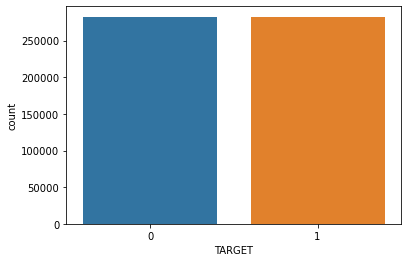

In [29]:
df_oversampler['TARGET']= y

# Balanced data count
sns.countplot(df_oversampler['TARGET'])

### Scaling

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

### PCA

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.14531451e-02, 5.10844854e-02, 4.28175082e-02, 3.55962760e-02,
       3.05215440e-02, 2.87423638e-02, 2.64541962e-02, 2.52255204e-02,
       2.46113784e-02, 2.19439074e-02, 2.13841704e-02, 2.00855057e-02,
       1.96053691e-02, 1.92597985e-02, 1.90176920e-02, 1.87930926e-02,
       1.86397396e-02, 1.85907731e-02, 1.85777006e-02, 1.85469425e-02,
       1.85263933e-02, 1.85194505e-02, 1.85177312e-02, 1.84989137e-02,
       1.84405870e-02, 1.83384020e-02, 1.82525336e-02, 1.82391805e-02,
       1.79782366e-02, 1.78676271e-02, 1.74470004e-02, 1.71086788e-02,
       1.67021866e-02, 1.63725832e-02, 1.61006391e-02, 1.58079621e-02,
       1.51955992e-02, 1.48228816e-02, 1.44319309e-02, 1.33784113e-02,
       1.30288271e-02, 1.29036527e-02, 1.20644725e-02, 1.16691115e-02,
       1.14821074e-02, 1.10018962e-02, 8.68043311e-03, 6.39654270e-03,
       5.22659339e-03, 2.47413710e-03, 1.41771675e-03, 1.27697461e-03,
       8.72674716e-04, 6.82243509e-06, 1.60638005e-32])

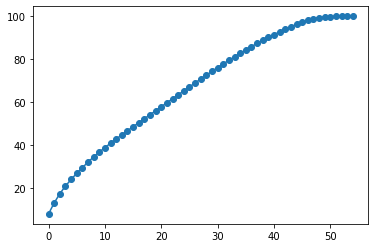

In [33]:
var1=np.cumsum(explained_variance*100)
plt.plot(var1,  marker='o')

In [34]:
pca = PCA(n_components = 50)
X_train50 = pca.fit_transform(X_train_scaled)
X_test50 = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_

In [35]:
explained_variance

array([0.08145315, 0.05108449, 0.04281751, 0.03559628, 0.03052154,
       0.02874236, 0.0264542 , 0.02522552, 0.02461138, 0.02194391,
       0.02138417, 0.02008551, 0.01960537, 0.0192598 , 0.01901769,
       0.01879309, 0.01863974, 0.01859077, 0.0185777 , 0.01854694,
       0.01852639, 0.01851945, 0.01851773, 0.01849891, 0.01844059,
       0.0183384 , 0.01825253, 0.01823918, 0.01797824, 0.01786763,
       0.017447  , 0.01710868, 0.01670219, 0.01637258, 0.01610064,
       0.01580796, 0.0151956 , 0.01482288, 0.01443193, 0.01337841,
       0.01302883, 0.01290365, 0.01206447, 0.01166911, 0.01148211,
       0.0110019 , 0.00868043, 0.00639654, 0.00522659, 0.00247414])

In [36]:
sum(explained_variance)

0.9964258114956692

## Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression(random_state = 101, multi_class = 'auto')
logmodel.fit(X_train50,y_train)

LogisticRegression(random_state=101)

In [39]:
predictions = logmodel.predict(X_test50)

#### Evaluation

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     84960
           1       0.80      0.80      0.80     84652

    accuracy                           0.80    169612
   macro avg       0.80      0.80      0.80    169612
weighted avg       0.80      0.80      0.80    169612



In [42]:
print(confusion_matrix(y_test, predictions))

[[68553 16407]
 [17197 67455]]


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA()),
                ('LR', LogisticRegression(random_state = 101, multi_class = 'auto'))])

In [44]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'pca', 'LR', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'LR__C', 'LR__class_weight', 'LR__dual', 'LR__fit_intercept', 'LR__intercept_scaling', 'LR__l1_ratio', 'LR__max_iter', 'LR__multi_class', 'LR__n_jobs', 'LR__penalty', 'LR__random_state', 'LR__solver', 'LR__tol', 'LR__verbose', 'LR__warm_start'])

In [45]:
#Brownlee(2020)
param_grid = {'pca__n_components':[50], # choose the number of pca components
        'LR__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'LR__penalty' : ['l2']}

In [46]:
grid = GridSearchCV(estimator=pipe,param_grid=param_grid,verbose=3)

In [47]:
grid.fit(X_train50,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END LR__penalty=l2, LR__solver=newton-cg, pca__n_components=50;, score=0.800 total time=   9.6s
[CV 2/5] END LR__penalty=l2, LR__solver=newton-cg, pca__n_components=50;, score=0.802 total time=  11.5s
[CV 3/5] END LR__penalty=l2, LR__solver=newton-cg, pca__n_components=50;, score=0.801 total time=   9.8s
[CV 4/5] END LR__penalty=l2, LR__solver=newton-cg, pca__n_components=50;, score=0.799 total time=   9.2s
[CV 5/5] END LR__penalty=l2, LR__solver=newton-cg, pca__n_components=50;, score=0.801 total time=  10.2s
[CV 1/5] END LR__penalty=l2, LR__solver=lbfgs, pca__n_components=50;, score=0.800 total time=   3.8s
[CV 2/5] END LR__penalty=l2, LR__solver=lbfgs, pca__n_components=50;, score=0.802 total time=   3.6s
[CV 3/5] END LR__penalty=l2, LR__solver=lbfgs, pca__n_components=50;, score=0.801 total time=   3.3s
[CV 4/5] END LR__penalty=l2, LR__solver=lbfgs, pca__n_components=50;, score=0.799 total time=   3.2s
[CV 5/5] EN

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('LR',
                                        LogisticRegression(random_state=101))]),
             param_grid={'LR__penalty': ['l2'],
                         'LR__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'pca__n_components': [50]},
             verbose=3)

In [48]:
grid.best_params_

{'LR__penalty': 'l2', 'LR__solver': 'lbfgs', 'pca__n_components': 50}

In [49]:
grid_predictions = grid.predict(X_test50)

In [50]:
print(confusion_matrix(y_test,grid_predictions))

[[68554 16406]
 [17197 67455]]


In [51]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     84960
           1       0.80      0.80      0.80     84652

    accuracy                           0.80    169612
   macro avg       0.80      0.80      0.80    169612
weighted avg       0.80      0.80      0.80    169612



### Neural Network

In [52]:
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

In [53]:
def create_model():
    classifier = Sequential()
    # adding 50 input PCAs, 25 nodes in the hidden layer
    classifier.add(Dense(input_dim=50,units=25,activation="relu"))
    #adding an additional hidden layer
    classifier.add(Dense(units=25, activation="relu" ))
    #adding the output layer with sigmoid function
    classifier.add(Dense(units=1, activation="sigmoid"))
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

In [54]:
#batch_size = [10, 100, 500]
#epochs = [10, 50, 100]
#tried GridSearch with the above parameter which took hours to complete. 
#Therefore, reducing the size of the parameter grid
#in order to capture the highest performing parameters

batch_size = [10]
epochs = [10, 100]
param_grid = dict(nn__batch_size=batch_size, nn__epochs=epochs)

In [63]:
estimators = []
#estimators.append(('ss', StandardScaler()))
#estimators.append(('pca', PCA()))
estimators.append(('nn', KerasClassifier(build_fn=create_model, verbose=3)))
nn_pipe = Pipeline(estimators)

In [64]:
nn_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'nn', 'nn__verbose', 'nn__build_fn'])

In [65]:
gs_nn = GridSearchCV(nn_pipe,param_grid,verbose=3)

In [66]:
gs_nn.fit(X_train50,y_train)

# IT WOULD TAKE UPTO 2-3 HOURS

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 1/5] END ..nn__batch_size=10, nn__epochs=10;, score=0.861 total time= 3.5min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 2/5] END ..nn__batch_size=10, nn__epochs=10;, score=0.867 total time= 4.1min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 3/5] END ..nn__batch_size=10, nn__epochs=10;, score=0.850 total time= 3.5min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 4/5] END ..nn__batch_size=10, nn__epochs=10;, score=0.855 total time= 3.4min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 5/5] END ..nn__batch_size=10, nn__epochs=10;, score=0.874

Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100


GridSearchCV(estimator=Pipeline(steps=[('nn',
                                        <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D921AE6160>)]),
             param_grid={'nn__batch_size': [10], 'nn__epochs': [10, 100]},
             verbose=3)

In [67]:
gs_nn.best_params_

{'nn__batch_size': 10, 'nn__epochs': 100}

In [68]:
y_pred = gs_nn.predict(X_test50)

In [69]:
y_pred = (y_pred>0.5)

In [70]:
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

#### Evaluation

In [71]:
cm = confusion_matrix(y_test,y_pred)

In [72]:
cm

array([[80300,  4660],
       [12923, 71729]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     84960
           1       0.94      0.85      0.89     84652

    accuracy                           0.90    169612
   macro avg       0.90      0.90      0.90    169612
weighted avg       0.90      0.90      0.90    169612

